* [What is pandas?](https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)

In [23]:
print("hello world")

hello world


In [1]:
import torch

torch.__version__

'2.3.0+cpu'

## Matrix Multiplication

![](images/how-to-multiply-2-matrices-demo.gif)

假设有一个笼子里有若干只鸡和兔子。已知鸡有2只脚，兔子有4只脚。通过统计，笼子里一共有10个头和28只脚。我们需要确定鸡和兔子的数量。

[使用矩阵解线性方程组：鸡兔同笼](linearEquation.md)
[solve chicken and rabbits issue](../src/chickenRabit.py)

In [10]:
a = torch.tensor([1,4,6])
print(a.shape)
a = a.reshape(1,3)
print(f'Matrix A shape: {a.shape}')

b = torch.tensor([[2,3],[5,8],[7,9]])
print(f'Matrix B shape: {b.shape}')

c =a @ b
print(c.shape)
print(c)

c = b @ a

torch.Size([3])
Matrix A shape: torch.Size([1, 3])
Matrix B shape: torch.Size([3, 2])
torch.Size([1, 2])
tensor([[64, 89]])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 1x3)

👍😄 **Conclusion**: When multiplying matrices, the inner dimensions must match. 

## Torch Tensor
* dim: dimension
* ndim: number of dimension
* 

In [25]:
t = torch.Tensor([[1,2,3,4,5,6,7,8,9],
                  [11,12,13,14,15,16,17,18,19]])
type(t), t.ndim, t.shape, t.size() # return representation of shape of a tensor

(torch.Tensor, 2, torch.Size([2, 9]), torch.Size([2, 9]))

In [5]:
t = torch.tensor(3)
t, t.ndim, t.ndimension

(tensor(3), 0, <function Tensor.ndimension>)

In [26]:
a = t.numpy()
type(a), a.ndim, a.shape, a.size

(numpy.ndarray, 2, (2, 9), 18)

In [27]:
t1 = torch.tensor(a)
type(t1), t1.ndim, t1.shape, t1.size

(torch.Tensor, 2, torch.Size([2, 9]), <function Tensor.size>)

In [28]:
# use a Tensor instance to represent a gray image,
# the number is between [0,255] to represent the grey degree
image = torch.Tensor(((12, 124),(34, 255),(67, 110)))
type(image), image.shape

(torch.Tensor, torch.Size([3, 2]))

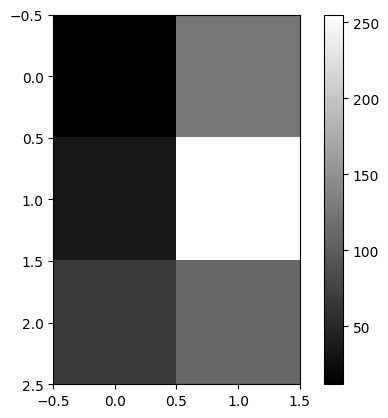

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

## Use functions empty(), ones(), zeros()

In [30]:
t = torch.empty(10,2)
t, type(t), t.ndim, t.shape

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Tensor,
 2,
 torch.Size([10, 2]))

In [31]:
t = torch.ones(10)
t, type(t), t.ndim, t.shape

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 torch.Tensor,
 1,
 torch.Size([10]))

In [32]:
t = torch.zeros(10,2)
t, type(t), t.ndim, t.shape

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Tensor,
 2,
 torch.Size([10, 2]))

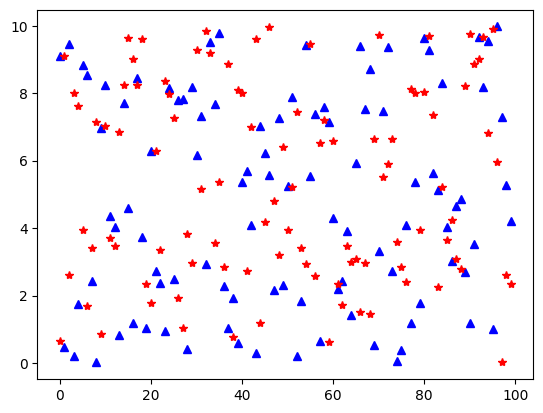

In [33]:
x = torch.empty(size=(2,100)).uniform_(0,10)
#create 2D array, 2 rows and 100 number which is uniformly distributed between 0 and 10.
plt.plot(x.numpy()[0],'b^')
plt.plot(x.numpy()[1],'r*')
plt.show()

In [34]:
t[0][1]=3
t[3][1]=4
t[6][0]=6
t,t.shape

(tensor([[0., 3.],
         [0., 0.],
         [0., 0.],
         [0., 4.],
         [0., 0.],
         [0., 0.],
         [6., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Size([10, 2]))

In [35]:
t1 = t.reshape(4,5)
t1,t1.T

(tensor([[0., 3., 0., 0., 0.],
         [0., 0., 4., 0., 0.],
         [0., 0., 6., 0., 0.],
         [0., 0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [3., 0., 0., 0.],
         [0., 4., 6., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

## Tensor Operation
1. +,-,*,/
2. sum(), sin(), cos(), numel()

In [36]:
x = torch.numel(t)
x1 = torch.sum(t)
x,x1

(20, tensor(13.))

## Understand Fashion Training Data

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)

print(f'Total training images is {len(training_data)}.')

train_loader = DataLoader(test_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Get a batch of data from the DataLoader
for images, labels in train_loader:
    # Get the tensor shape of the data
    print(images.shape)
    break  # Stop after the first batch

Total training images is 60000.
torch.Size([64, 1, 28, 28])


<class 'torchvision.datasets.mnist.FashionMNIST'>
torch.Size([1, 28, 28]) tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

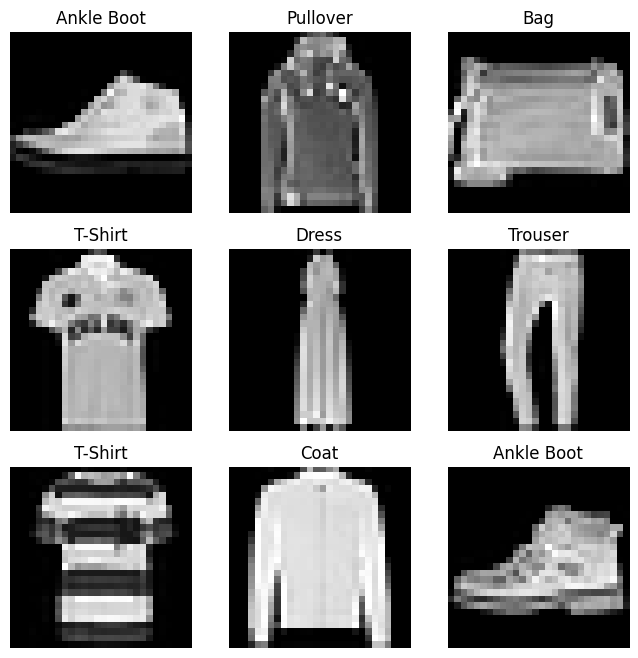

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
print(type(training_data))
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(0, cols * rows): # [0,9)
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # get random index
#    sample_idx = i
    img, label = training_data[sample_idx]
    print(img.shape, img)
#    print(img[0,0,0])
    figure.add_subplot(rows, cols, i+1)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

for each image, there are 28X28 numbers to represent each pixle gray level [0,255], total 60000 images, the another dimension is for the index of each image. for instance,

In [4]:
img.shape

torch.Size([1, 28, 28])

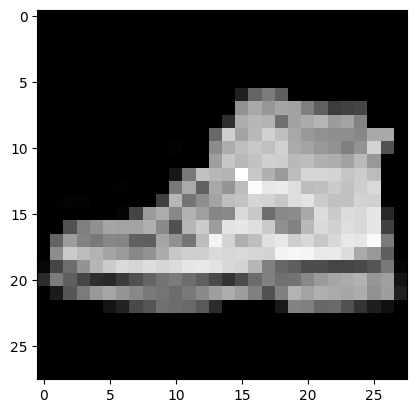

In [6]:
plt.imshow(img.squeeze(),cmap="gray")

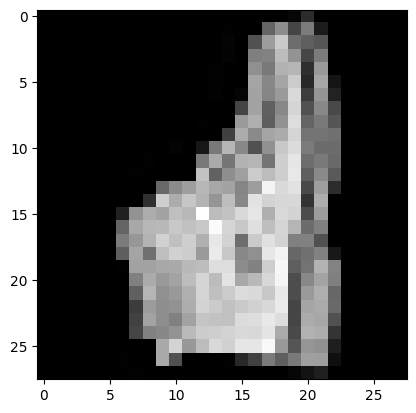

In [10]:
img = img.transpose(0,1).transpose(1,2)
plt.imshow(img.squeeze(),cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


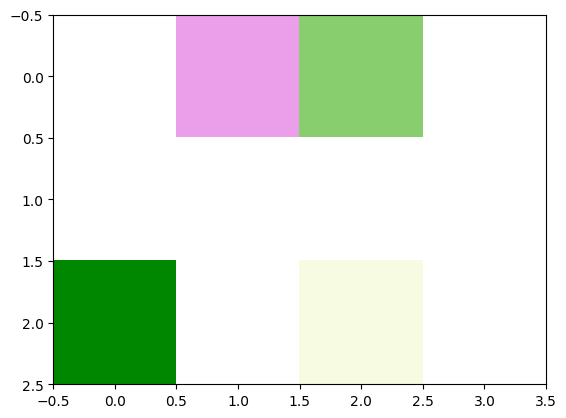

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 4, 3])


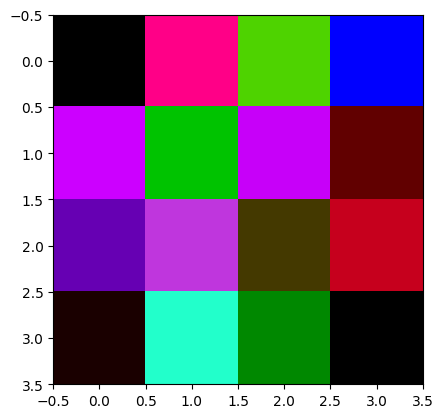

In [16]:
# Example image tensor of shape (3, 128, 128) representing a 128x128 RGB image
img = torch.randn(3, 4, 4)
plt.imshow(img)
plt.show()
# Transpose the tensor
transposed_img = img.transpose(0, 1).transpose(1,2) # switch first and second dimension, and then switch 1, 2
  
# Check the shape of the transposed tensor
print(transposed_img.shape)  # Output: torch.Size([128, 3, 128])
plt.imshow(transposed_img)

In [40]:
import torch
img = torch.tensor([[[80,29],[60,40]],[[11,44],[21,69]],[[31,49],[12,66]]]) # 3 2X2 images
print(img.shape)
img[1] # 第2个图形

torch.Size([3, 2, 2])


tensor([[11, 44],
        [21, 69]])

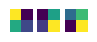

In [42]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(1, 2))
cols, rows = 3, 1
for i in range(0, rows * cols ): # [0,3)
    figure.add_subplot(1, cols, i+1)
    plt.axis("off")
    plt.imshow(img[i].squeeze())
plt.show()

torch.Size([1, 2, 2])


(torch.Size([2, 2]),
 tensor([[1, 2],
         [4, 5]]))

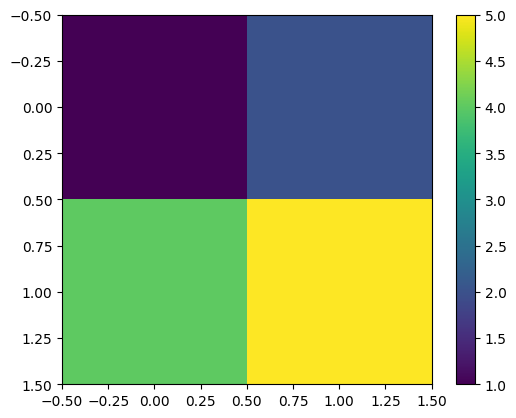

In [49]:
img = torch.tensor([[[1,2],[4,5]]]) # 1个2X2的图像
print(img.shape)
plt.figure()
img1 = img.squeeze() # 这个功能块把3维变成2维
plt.imshow(img1)
plt.colorbar()

img1.shape, img1

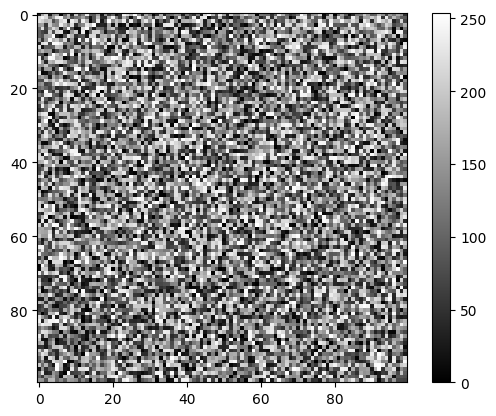

In [53]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Define a custom colormap mapping values from 0 to 255 to colors
colors = [(0, 0, 0), (1, 1, 1)]  # Black to white
cmap_name = 'custom_map'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Create a sample image (replace this with your image)
image = np.random.randint(0, 255, (100, 100))

plt.figure()
plt.imshow(image, cmap=cm)
plt.colorbar()
plt.grid(False)
plt.show()


In [1]:
a,b = 10,20
print(a,b)
print(f'area={a}, length={b}')
print('area={a}, length={b}')

10 20
area=10, length=20
area={a}, length={b}
